In [4]:
import matplotlib.pylab as plt
import numpy as np
import glob
from scipy.interpolate import UnivariateSpline
%config InlineBackend.figure_format = 'retina'


In [5]:
def load_gibbs(fold):
    PT_IceIh_Liquid=glob.glob(fold+'/*_*_*')
    PT_IceIh_Liquid=[[float(a.split('/')[-1].split('_')[1]),float(a.split('/')[-1].split('_')[2])]  for a in PT_IceIh_Liquid]
    PT_IceIh_Liquid=np.array(PT_IceIh_Liquid)
    PT_IceIh_Liquid=PT_IceIh_Liquid[np.argsort(PT_IceIh_Liquid[:,1])]
    return PT_IceIh_Liquid

In [6]:
IceIII_Liquid = np.loadtxt('../IceIII_Liquid/5-BiasedCoexistence/store_21_12_2021/P_T.dat')
IceV_Liquid = np.loadtxt('../IceV_Liquid/4-BiasedCoexistence/P_T.dat')
IceVI_Liquid = np.loadtxt('../IceVI_Liquid/5-BiasedCoexistence/P_T.dat')
IceIh_Liquid = np.loadtxt('../IceIh_Liquid/3-BiasedCoexistence/P_T.dat')
IceII_Liquid = np.loadtxt('../IceII_Liquid/5-BiasedCoexistence/P_T.dat')

# GD_IceIh_Liquid=load_gibbs('../Gibbs_Duhem_Simulations/ACCURATE/IceIh_Liquid/0.0atm_269.6K/')
# GD_IceIII_Liquid=load_gibbs('../Gibbs_Duhem_Simulations/ACCURATE/IceIII_Liquid/*atm_*K/')
# GD_IceVI_Liquid=load_gibbs('../Gibbs_Duhem_Simulations/ACCURATE/IceVI_Liquid/*atm_*K/')
# GD_IceV_Liquid=load_gibbs('../Gibbs_Duhem_Simulations/ACCURATE/IceV_Liquid/*atm_*K/')


tip4p_vega_data=np.genfromtxt('tip4p_ice_pd.dat')
tip4p_vega_data[:,1]=tip4p_vega_data[:,1]*10*0.986923
tip4p_vega_data2=np.genfromtxt('tip4p_ice_pd2.dat')
tip4p_vega_data2[:,1]=tip4p_vega_data2[:,1]*1000*0.986923

# Ice_III_Liquid_spl = UnivariateSpline(IceIII_Liquid[:,0], IceIII_Liquid[:,1])
# Ice_Ih_Liquid_spl = UnivariateSpline(IceIh_Liquid[:,0], IceIh_Liquid[:,1])
# IceVI_Liquid_spl = UnivariateSpline(IceVI_Liquid[:,0], IceVI_Liquid[:,1])
# IceV_Liquid_spl = UnivariateSpline(IceV_Liquid[:,0], IceV_Liquid[:,1])

# Ice_III_Liquid_spl.set_smoothing_factor(0.05)
# Ice_Ih_Liquid_spl.set_smoothing_factor(0.05)




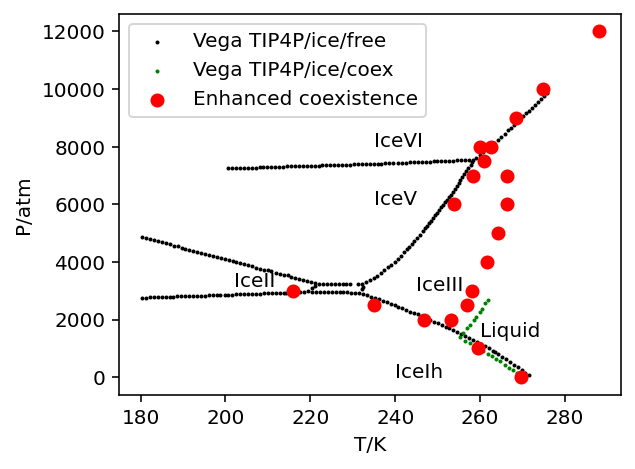

In [8]:
plt.figure(figsize=(4.5,3.5))
plt.scatter(tip4p_vega_data[:,0],tip4p_vega_data[:,1],label='Vega TIP4P/ice/free',s=1,color='k')
plt.scatter(tip4p_vega_data2[:,0],tip4p_vega_data2[:,1],label='Vega TIP4P/ice/coex',s=1,color='g')

t_range=np.linspace(210,270,200)
p_range_IceIII_Liquid = np.linspace(1750,7000,200)
p_range_IceIh_Liquid = np.linspace(0,3000,200)


#idx = np.argwhere(np.diff(np.sign(Ice_III_Liquid_spl(p_range_IceIII_Liquid) - Ice_Ih_Liquid_spl(p_range_IceIh_Liquid)))).flatten()[0]
#p_range=np.linspace(0,9000,2000)
#P=p_range[np.argwhere(np.diff(np.sign(Ice_III_Liquid_spl(p_range) - Ice_Ih_Liquid_spl(p_range)))).flatten()[0]]
# print(P)
plt.scatter(IceIII_Liquid[:,1],IceIII_Liquid[:,0],color='r',label='Enhanced coexistence')
plt.scatter(IceVI_Liquid[:,1],IceVI_Liquid[:,0],color='r')#,label='Enhanced coexistence')
plt.scatter(IceV_Liquid[:,1],IceV_Liquid[:,0],color='r')
plt.scatter(IceIh_Liquid[:,1],IceIh_Liquid[:,0],color='r')
#plt.scatter(IceII_Liquid[:,1],IceII_Liquid[:,0],color='r')

#Splines
#plt.scatter(IceIh_Liquid[:,1],IceIh_Liquid[:,0],color='r')


#plt.plot(GD_IceIII_Liquid[:,0],GD_IceIII_Liquid[:,1],color='b',label='Gibbs-Duhem')

#plt.plot(Ice_III_Liquid_spl(p_range_IceIII_Liquid[p_range_IceIII_Liquid>P]),p_range_IceIII_Liquid[p_range_IceIII_Liquid>P],color='r')
# plt.plot(GD_IceIh_Liquid[:,0],GD_IceIh_Liquid[:,1],color='b')
# plt.plot(GD_IceIII_Liquid[:,0],GD_IceIII_Liquid[:,1],color='b')
# plt.plot(GD_IceVI_Liquid[:,0],GD_IceVI_Liquid[:,1],color='b')
# plt.plot(GD_IceV_Liquid[:,0],GD_IceV_Liquid[:,1],color='b')

#plt.scatter(IceIh_Liquid[idx:,1],IceIh_Liquid[:,0],ls=)

#plt.plot(Ice_Ih_Liquid_spl(p_range_IceIh_Liquid[p_range_IceIh_Liquid<P]),p_range_IceIh_Liquid[p_range_IceIh_Liquid<P],color='r')
#plt.plot(Ice_Ih_Liquid_spl(p_range_IceIh_Liquid[p_range_IceIh_Liquid>P]),p_range_IceIh_Liquid[p_range_IceIh_Liquid>P],ls='--',color='r')

#plt.xlim([0,290])
#plt.ylim([-3000,16000])
#plt.xlim([200,300])

plt.annotate('IceIh',(240,0))
plt.annotate('Liquid',(260,1400))
plt.annotate('IceIII',(245,3000))
plt.annotate('IceV',(235,6000))
plt.annotate('IceII',(202,3150))
plt.annotate('IceVI',(235,8000))
plt.ylabel('P/atm')
plt.xlabel('T/K')

plt.legend()